In [2]:
# k nearest neighbor - knn
#--------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv(r"gene_expression.csv")

In [4]:
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

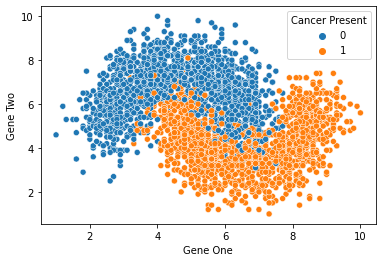

In [5]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present')

(4.0, 8.0)

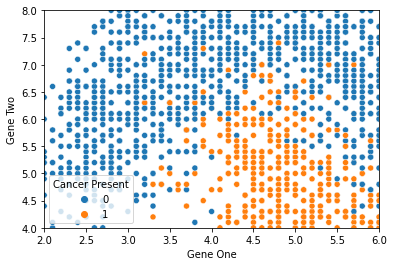

In [6]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)

In [7]:
# importing sklearn for model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
# feature scaling 
X = df.drop('Cancer Present',axis=1) # x=df['gene one','gene two']
y = df['Cancer Present']
print(X.shape)
print(y.shape)

(3000, 2)
(3000,)


In [9]:
# feature engineering
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
print(X_train.shape)
print(y_train.shape)
print('first 10 training time samples')
print(X_train.head(10))

# here, X_train = training input sample
# X_test = testing input sample
# y_train = output cls label for training input samples
# y_test = output cls label for testing input samples

(2400, 2)
(2400,)
first 10 training time samples
      Gene One  Gene Two
2369       4.2       7.1
1164       2.8       5.5
477        7.7       4.2
1728       3.3       4.8
1065       5.7       6.1
2381       6.0       7.7
504        6.2       6.1
2140       5.1       7.6
354        7.6       4.1
1255       2.5       4.9


In [10]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(X_train[:5])
print('--------------------------')
print(scaled_X_train[:5])

      Gene One  Gene Two
2369       4.2       7.1
1164       2.8       5.5
477        7.7       4.2
1728       3.3       4.8
1065       5.7       6.1
--------------------------
[[-0.76852734  0.986832  ]
 [-1.53694034  0.0533127 ]
 [ 1.15250514 -0.70517173]
 [-1.26250712 -0.35510199]
 [ 0.0547723   0.40338244]]


In [11]:
# knn classifier and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7) # here n_neighbors is k 
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [12]:
#prediction
ypre = knn.predict(scaled_X_test)

In [13]:
# for classification report 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [14]:
confusion_matrix(y_test,ypre) # y_test = actual output ypre = predicted output

array([[282,  21],
       [ 20, 277]], dtype=int64)

In [15]:
len(y_test)

600

In [16]:
print(classification_report(y_test,ypre))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       303
           1       0.93      0.93      0.93       297

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



In [17]:
from sklearn.metrics import accuracy_score

In [18]:

accuracy_score(y_test,ypre)

# output ends here itself
# ------------------------------------------
# the entire program completes it self here
#-------------------------------------------

0.9316666666666666

In [19]:
#error
t=1-accuracy_score(y_test,ypre)
t

0.06833333333333336

In [20]:
error_rate = []

# Will take some time
for i in range(1,11):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    t=1-accuracy_score(y_test,pred_i)
    error_rate.append(t)
# print(error_rate)

Text(0, 0.5, 'Error Rate')

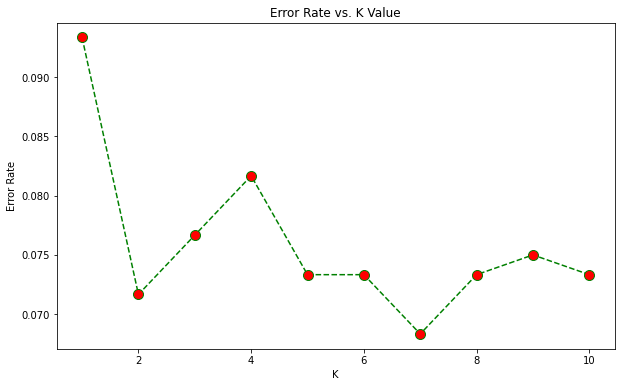

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='green', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [22]:
# 5.1

# 5.079875765555

# 5.134574345566